In [55]:
from google.colab import drive
drive.mount('/content/drive') # Monte Google Drive vikenvik9@gmail.com

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import KFold

1 Exploration et pré-traitement des données

In [57]:
# Chargement et visualisation du dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv("drive/MyDrive/Bloc3Viken/Bloc3-Ex2-uber.csv")
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [58]:
# Afficher le nombre de lignes et colonnes du dataframe
df.shape

(9345, 57)

In [59]:
# Identifier les valeurs manquantes et explorer le type des données du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9345 non-null   object 
 1   timestamp                    9345 non-null   float64
 2   hour                         9345 non-null   int64  
 3   day                          9345 non-null   int64  
 4   month                        9345 non-null   int64  
 5   datetime                     9345 non-null   object 
 6   timezone                     9345 non-null   object 
 7   source                       9345 non-null   object 
 8   destination                  9345 non-null   object 
 9   cab_type                     9345 non-null   object 
 10  product_id                   9345 non-null   object 
 11  name                         9345 non-null   object 
 12  price                        8627 non-null   float64
 13  distance          

In [60]:
# Créer un nouveau dataframe conservant les colonnes numériques, la colonne cab_type, la colonne datetime
colonnes_a_garder = df.select_dtypes(include=['number']).columns.tolist()
colonnes_a_garder.extend(['cab_type', 'datetime'])

df_new = df[colonnes_a_garder].copy()  # Créer le nouveau DataFrame

In [61]:
# Convertir la colonne datetime au format datetime et supprimer les colonnes id et timestamp
df_new = df_new.drop(columns=['id', 'timestamp'], errors='ignore')  # Supprimer sans erreur si colonne absente
df_new['datetime'] = pd.to_datetime(df_new['datetime'])  # Convertir datetime
df_new.info()  # Vérifier que datetime est bien en format datetime64
df_new.head()  # Afficher les premières lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   hour                         9345 non-null   int64         
 1   day                          9345 non-null   int64         
 2   month                        9345 non-null   int64         
 3   price                        8627 non-null   float64       
 4   distance                     9345 non-null   float64       
 5   surge_multiplier             9345 non-null   float64       
 6   latitude                     9345 non-null   float64       
 7   longitude                    9345 non-null   float64       
 8   temperature                  9345 non-null   float64       
 9   apparentTemperature          9345 non-null   float64       
 10  precipIntensity              9345 non-null   float64       
 11  precipProbability            9345 non-null 

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cab_type,datetime
0,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Lyft,2018-12-16 09:30:00
1,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Lyft,2018-11-27 02:00:00
2,1,28,11,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Lyft,2018-11-28 01:00:00
3,4,30,11,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Lyft,2018-11-30 04:53:00
4,3,29,11,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Lyft,2018-11-29 03:49:00


In [62]:
# Remplir les valeurs manquantes de la colonne price par la moyenne de la colonne price

# Initialiser l'imputer avec la stratégie "mean"
imputer = SimpleImputer(strategy="mean")

# Appliquer l'imputation sur la colonne 'price' et conserver le résultat dans le DataFrame
df_new[['price']] = imputer.fit_transform(df_new[['price']])

# Vérifier si les valeurs manquantes ont été remplies
print(df_new['price'].isnull().sum())  # Doit afficher 0
df_new.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   hour                         9345 non-null   int64         
 1   day                          9345 non-null   int64         
 2   month                        9345 non-null   int64         
 3   price                        9345 non-null   float64       
 4   distance                     9345 non-null   float64       
 5   surge_multiplier             9345 non-null   float64       
 6   latitude                     9345 non-null   float64       
 7   longitude                    9345 non-null   float64       
 8   temperature                  9345 non-null   float64       
 9   apparentTemperature          9345 non-null   float64       
 10  precipIntensity              9345 non-null   float64       
 11  precipProbability            9345 non-nul

In [63]:
# Suppression des colonnes non pertinentes
colonnes_a_supprimer = [
    # Colonnes redondantes ou inutiles
    'apparentTemperature', 'temperatureHigh', 'temperatureLow',
    'apparentTemperatureHigh', 'apparentTemperatureLow',
    'visibility.1', 'dewPoint', 'pressure', 'ozone', 'moonPhase', 'windBearing',

    # Colonnes temporelles inutiles (suppression de la colonne month car seulement novembre et décembre)
    'windGustTime', 'temperatureHighTime', 'temperatureLowTime',
    'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
    'sunriseTime', 'sunsetTime', 'uvIndexTime', 'month'

    # Autres colonnes non pertinentes
    'precipProbability', 'windGust', 'temperatureMin', 'temperatureMinTime',
    'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
    'apparentTemperatureMinTime', 'apparentTemperatureMax',
    'apparentTemperatureMaxTime'
]

# Supprimer les colonnes
df_new = df_new.drop(columns=colonnes_a_supprimer, errors='ignore')

# Créer une colonne "day_of_week" pour avoir les jours de la semaine
df_new['day_of_week'] = df_new['datetime'].dt.dayofweek  # 0 = Lundi, 6 = Dimanche

# Sélectionner uniquement les colonnes finales utiles
colonnes_finales = [
    'datetime', 'cab_type', 'hour', 'day', 'day_of_week', 'distance', 'latitude', 'longitude',
    'price', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed',
    'precipIntensity', 'cloudCover', 'visibility'
]
df_clean = df_new[colonnes_finales].copy()

# Afficher un aperçu du DataFrame nettoyé
print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          9345 non-null   datetime64[ns]
 1   cab_type          9345 non-null   object        
 2   hour              9345 non-null   int64         
 3   day               9345 non-null   int64         
 4   day_of_week       9345 non-null   int32         
 5   distance          9345 non-null   float64       
 6   latitude          9345 non-null   float64       
 7   longitude         9345 non-null   float64       
 8   price             9345 non-null   float64       
 9   surge_multiplier  9345 non-null   float64       
 10  temperature       9345 non-null   float64       
 11  humidity          9345 non-null   float64       
 12  windSpeed         9345 non-null   float64       
 13  precipIntensity   9345 non-null   float64       
 14  cloudCover        9345 n

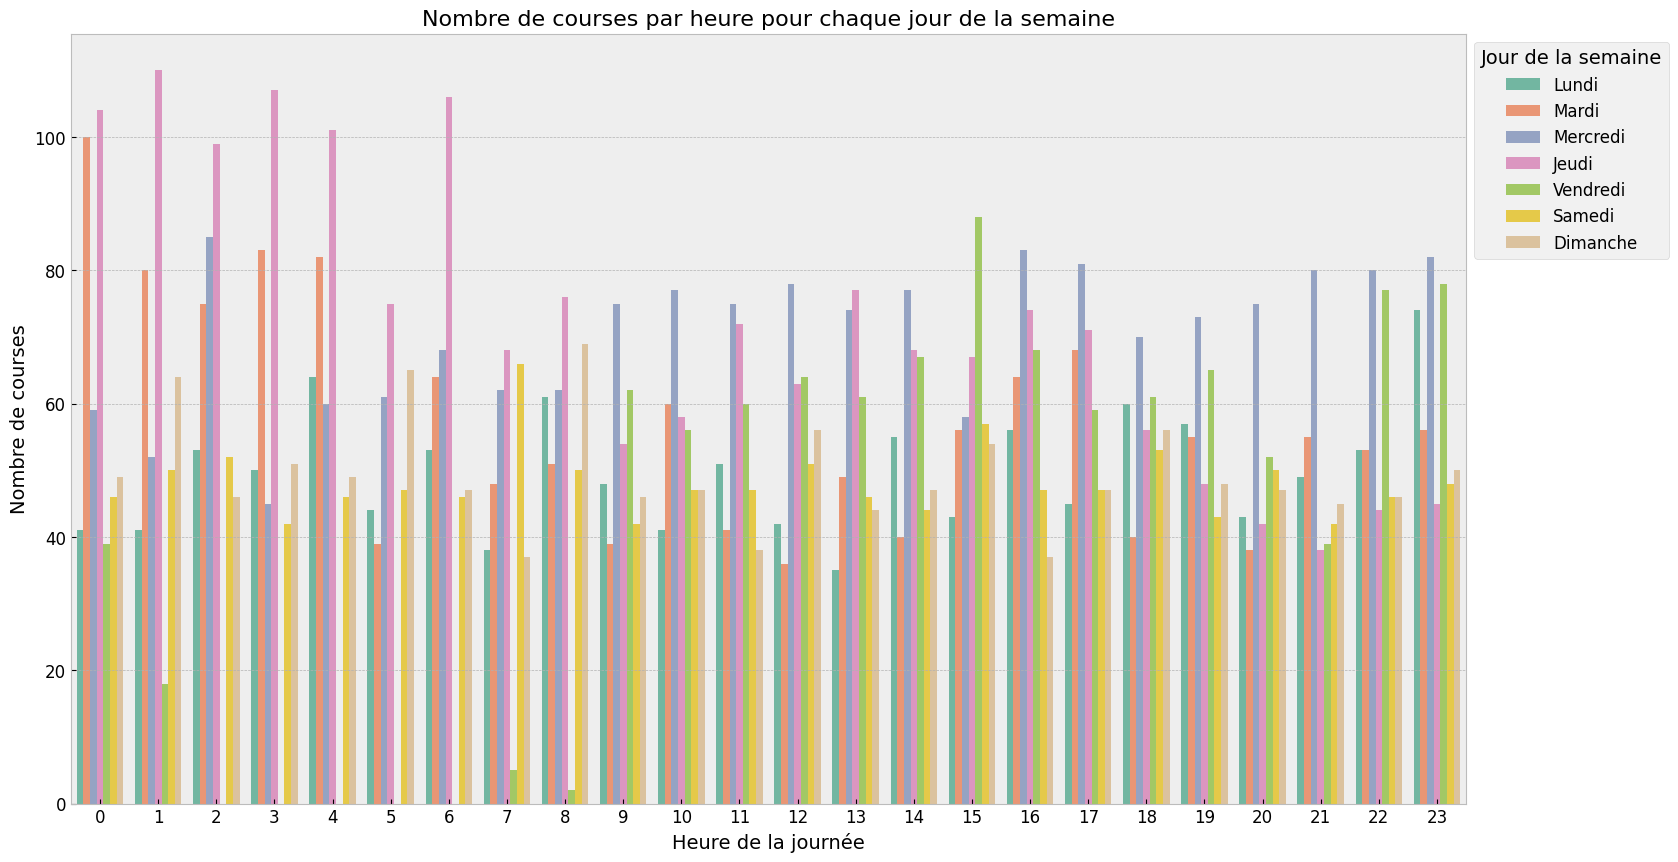

In [64]:
# Ajouter une colonne donnant le nom du jour de la semaine pour plus de clarté
df_clean['day_of_week_name'] = df_clean['day_of_week'].map({
    0: 'Lundi', 1: 'Mardi', 2: 'Mercredi', 3: 'Jeudi',
    4: 'Vendredi', 5: 'Samedi', 6: 'Dimanche'
})

# Regrouper le nombre de courses par heure de la journée et par jour de la semaine
df_grouped = df_clean.groupby(['day_of_week_name', 'hour']).size().reset_index(name='count')

# Créer le graphique
plt.figure(figsize=(18, 10))

# Définir la palette Set2 (7 couleurs, une pour chaque jour)
palette = sns.color_palette("Set2", n_colors=7)

# Créer le barplot avec la palette définie manuellement
ax = sns.barplot(data=df_grouped, x='hour', y='count', hue='day_of_week_name', palette=palette, width=0.8)

# Ajouter des labels
plt.xlabel('Heure de la journée', fontsize=14)
plt.ylabel('Nombre de courses', fontsize=14)
plt.title('Nombre de courses par heure pour chaque jour de la semaine', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Modifier la légende pour que la couleur de chaque jour soit correctement affichée
# Nous accédons à la légende, et nous ajustons ses handles (les couleurs des légendes)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'],
          title="Jour de la semaine", fontsize=12, title_fontsize=14, bbox_to_anchor=(1, 1), loc='upper left')

# Afficher le graphique
plt.show()

In [65]:
# Ajouter colonnes transformant l'heure en coordonnées circulaires
df_clean["hour_sin"] = np.sin(2 * np.pi * df_clean["hour"] / 24)
df_clean["hour_cos"] = np.cos(2 * np.pi * df_clean["hour"] / 24)


In [66]:
# Afficher les statistiques pour les colonnes numériques
df_clean.describe()

,datetime,hour,day,day_of_week,distance,latitude,longitude,price,surge_multiplier,temperature,humidity,windSpeed,precipIntensity,cloudCover,visibility,hour_sin,hour_cos
count,9345,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9.345000e+03
mean,2018-12-05 17:09:53.804173312,11.518352,17.921241,2.737079,2.126278,42.337999,-71.066217,16.307813,1.012975,39.591296,0.739766,6.238421,0.008931,0.685764,8.457400,-0.019924,7.410498e-03
min,2018-11-26 04:40:00,0.000000,1.000000,0.000000,0.300000,42.214800,-71.105400,2.500000,1.000000,18.910000,0.380000,0.450000,0.000000,0.000000,0.717000,-1.000000,-1.000000e+00
25%,2018-11-28 21:05:00,5.000000,13.000000,1.000000,1.250000,42.350300,-71.081000,9.500000,1.000000,36.530000,0.640000,3.450000,0.000000,0.370000,8.432000,-0.707107,-7.071068e-01
50%,2018-12-02 04:53:00,12.000000,17.000000,3.000000,2.010000,42.351900,-71.063100,15.000000,1.000000,40.490000,0.710000,5.920000,0.000000,0.820000,9.882000,0.000000,6.123234e-17
75%,2018-12-14 18:10:00,17.000000,28.000000,5.000000,2.850000,42.364700,-71.054200,22.500000,1.000000,43.580000,0.880000,8.410000,0.000000,1.000000,10.000000,0.707107,7.071068e-01
max,2018-12-18 19:15:00,23.000000,30.000000,6.000000,7.460000,42.366100,-71.033000,67.500000,2.500000,57.220000,0.960000,15.000000,0.144700,1.000000,10.000000,1.000000,1.000000e+00
std,NaN,6.992467,10.005179,2.044900,1.134414,0.048042,0.020417,8.781358,0.088910,6.801420,0.138943,3.151317,0.027046,0.359984,2.618748,0.699058,7.148241e-01


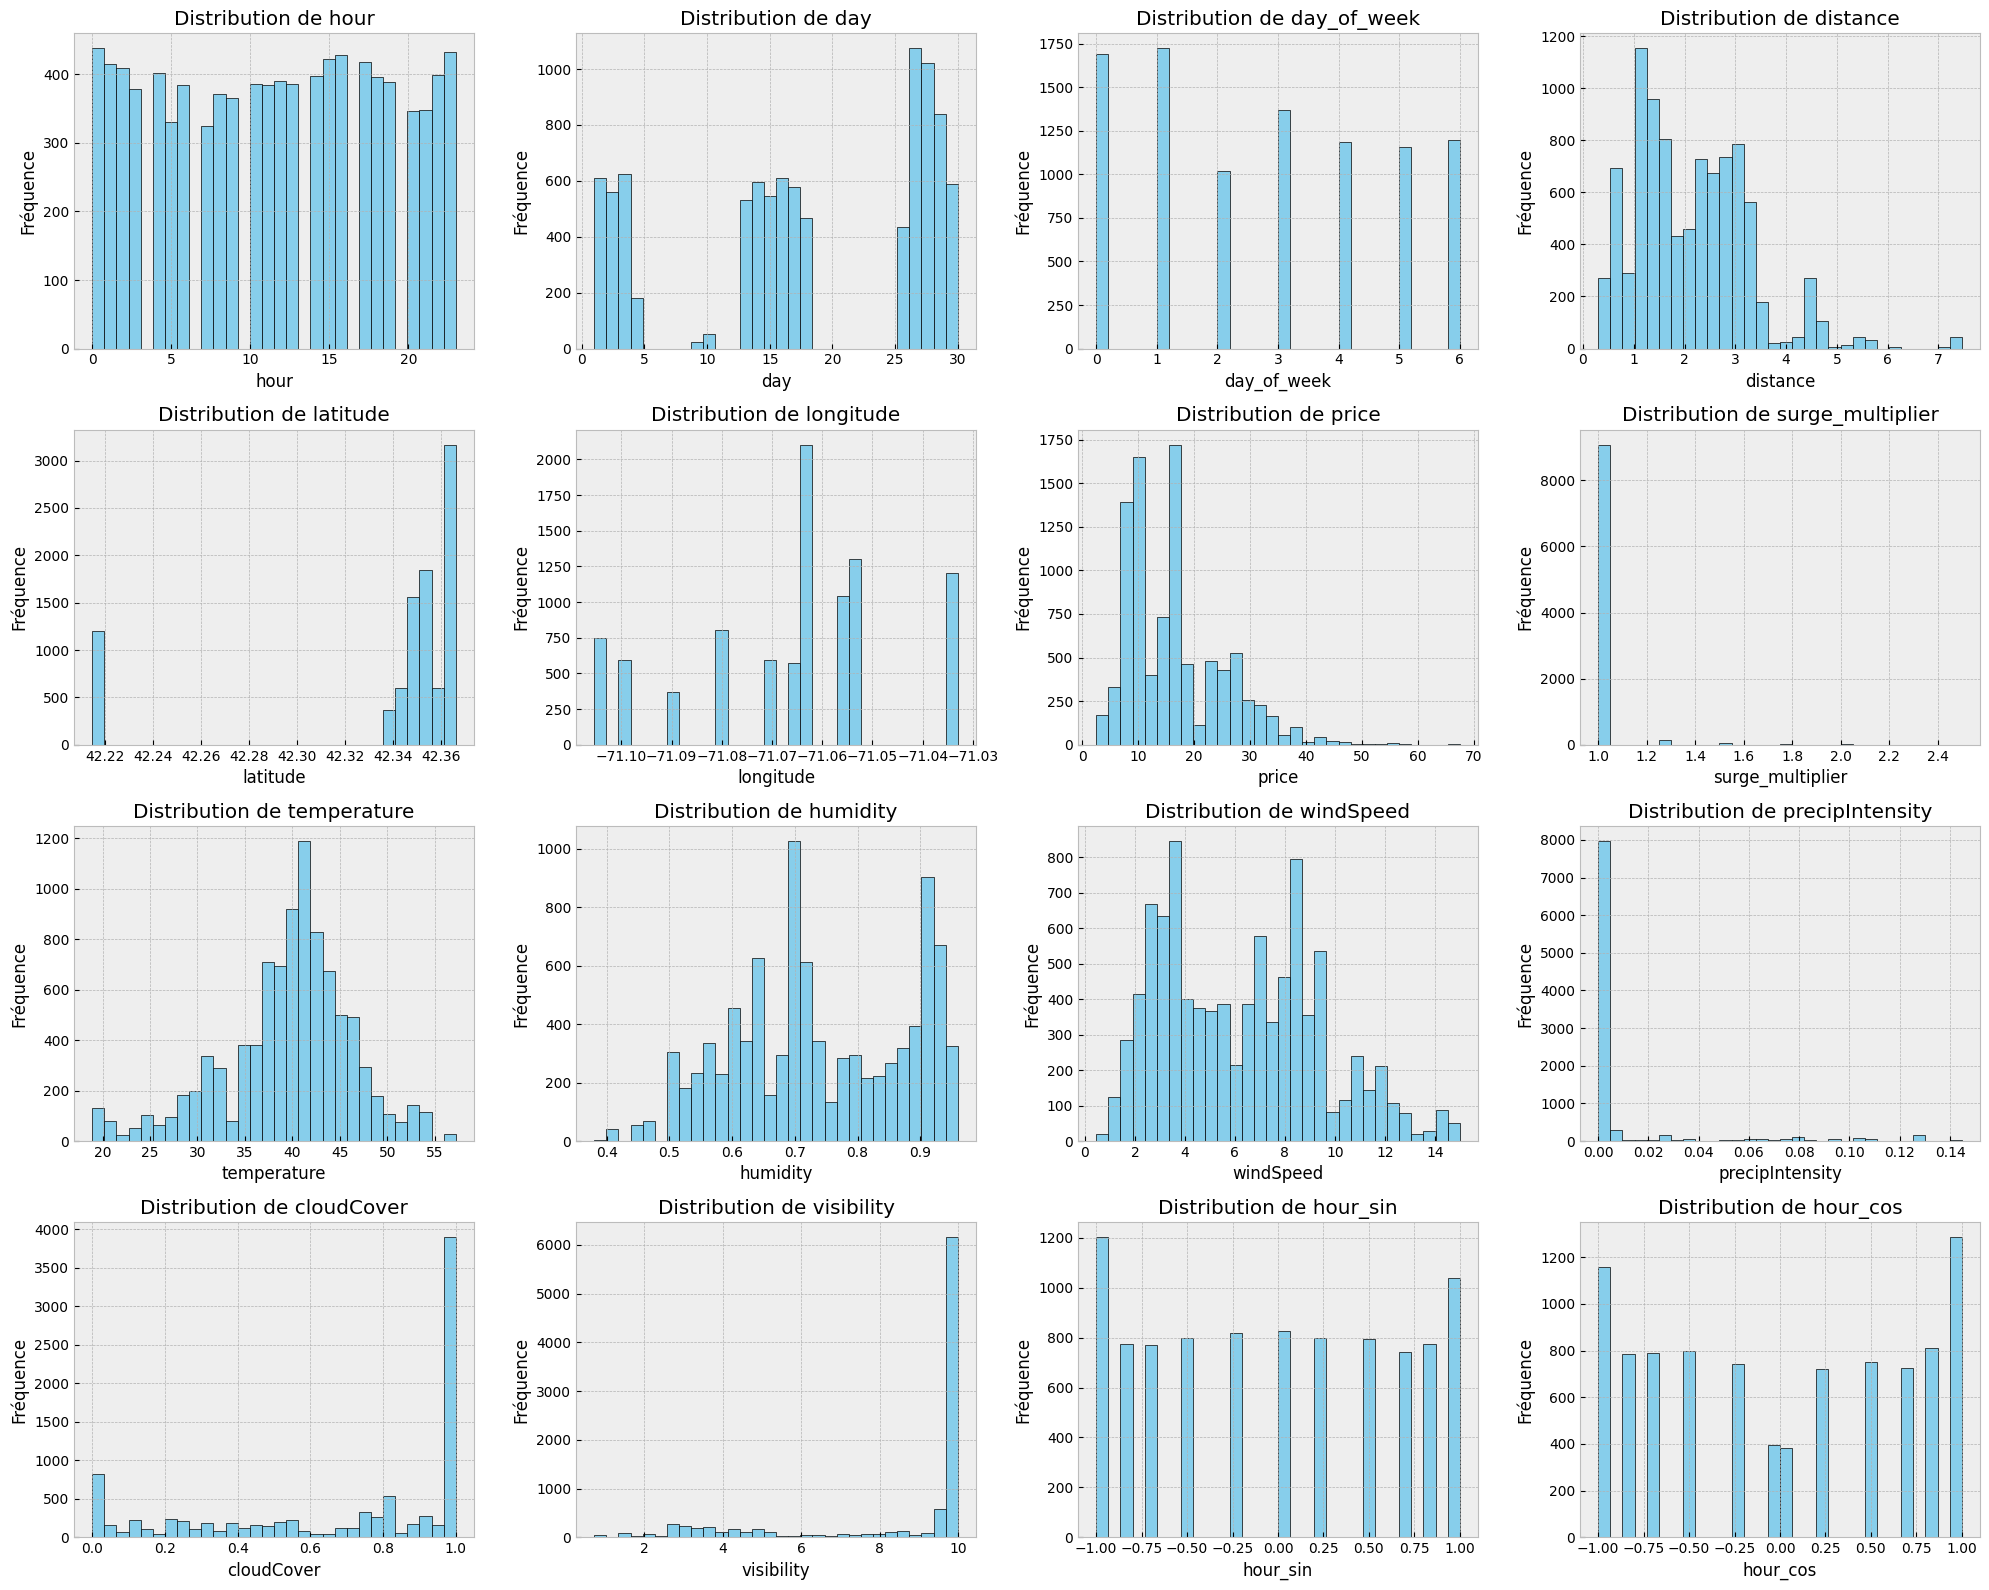

In [69]:
# Visulaiser la distribution des colonnes
columns_to_plot = [
    'hour', 'day', 'day_of_week', 'distance', 'latitude', 'longitude',
    'price', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed',
    'precipIntensity', 'cloudCover', 'visibility', 'hour_sin', 'hour_cos'
]

# Définir la taille de la grille pour les subplots
n_cols = 4
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

# Créer la figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Tracer chaque histogramme
for i, col in enumerate(columns_to_plot):
    axes[i].hist(df_clean[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

# Supprimer les axes vides si nécessaire
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


                      hour       day  day_of_week  distance  latitude  \
hour              1.000000  0.054365     0.002003  0.014217  0.018601   
day               0.054365  1.000000    -0.285072 -0.006570 -0.007333   
day_of_week       0.002003 -0.285072     1.000000 -0.005703  0.129057   
distance          0.014217 -0.006570    -0.005703  1.000000  0.018652   
latitude          0.018601 -0.007333     0.129057  0.018652  1.000000   
longitude         0.008881  0.080808    -0.087937 -0.031906 -0.533648   
price            -0.000791 -0.001687     0.008092  0.323362  0.023805   
surge_multiplier -0.021277 -0.006641    -0.005810 -0.006604  0.009972   
temperature       0.224628 -0.079925    -0.095258 -0.004917 -0.112126   
humidity         -0.259605 -0.079093    -0.096975 -0.004429 -0.140911   
windSpeed         0.072887  0.446592    -0.372825  0.002929 -0.101943   
precipIntensity  -0.235193  0.106039    -0.149390  0.003420 -0.099250   
cloudCover        0.048636 -0.022106    -0.239537  

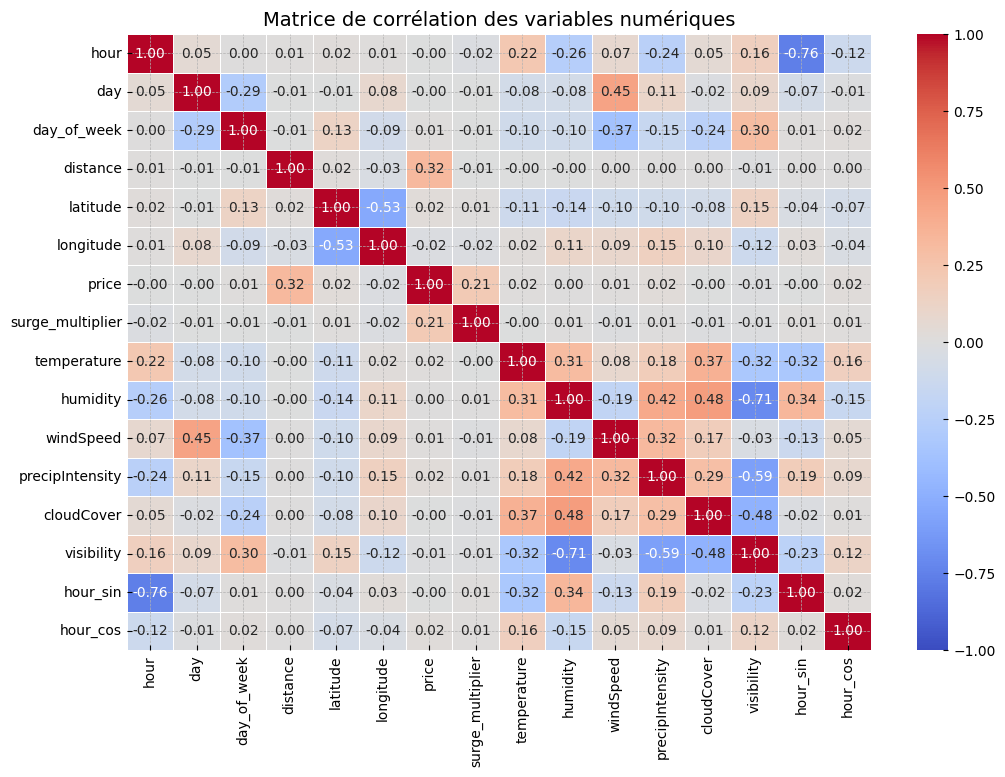

In [70]:
# Vérifier la corrélation entre les colonnes numériques (utile pour PCA)

# Sélectionner uniquement les colonnes numériques
df_num = df_clean.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
corr_matrix = df_num.corr()
print(corr_matrix)

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Ajouter un titre
plt.title("Matrice de corrélation des variables numériques", fontsize=14)

# Afficher le graphique
plt.show()

In [71]:
# Création des dataframe Uber et Lyft avant normalisation et PCA
# Liste des colonnes à conserver

columns_to_keep = [
    "hour", "day_of_week",
    "hour_sin", "hour_cos", # Heure (périodique)
    "distance", "latitude", "longitude",  # Géographie
    "price",  # Tarification
    "temperature", "humidity", "windSpeed"  # Météo
]


# Filtrage des DataFrames pour Lyft et Uber
df_pca_lyft = df_clean[df_clean["cab_type"] == "Lyft"][columns_to_keep].copy()
df_pca_uber = df_clean[df_clean["cab_type"] == "Uber"][columns_to_keep].copy()

# Vérification des tailles des datasets
print("Nombre de courses Lyft :", df_pca_lyft.shape[0])
print("Nombre de courses Uber :", df_pca_uber.shape[0])

# Affichage des premières lignes
df_pca_lyft.head(), df_pca_uber.head()

Nombre de courses Lyft : 4301
Nombre de courses Uber : 5044


(   hour  day_of_week  hour_sin  hour_cos  distance  latitude  longitude  \
 0     9            6  0.707107 -0.707107      0.44   42.2148    -71.033   
 1     2            1  0.500000  0.866025      0.44   42.2148    -71.033   
 2     1            2  0.258819  0.965926      0.44   42.2148    -71.033   
 3     4            4  0.866025  0.500000      0.44   42.2148    -71.033   
 4     3            3  0.707107  0.707107      0.44   42.2148    -71.033   
 
    price  temperature  humidity  windSpeed  
 0    5.0        42.34      0.68       8.66  
 1   11.0        43.58      0.94      11.98  
 2    7.0        38.33      0.75       7.33  
 3   26.0        34.38      0.73       5.28  
 4    9.0        37.44      0.70       9.14  ,
     hour  day_of_week  hour_sin  hour_cos  distance  latitude  longitude  \
 12    22            4 -0.500000  0.866025      1.11   42.3647   -71.0542   
 13    10            3  0.500000 -0.866025      1.11   42.3647   -71.0542   
 14    19            3 -0.965926  

2 - Normalisation des données avant PCA

In [72]:
# Normalisation des données pour Lyft
scaler_lyft = StandardScaler()
df_pca_lyft_scaled = scaler_lyft.fit_transform(df_pca_lyft)

# Normalisation des données pour Uber
scaler_uber = StandardScaler()
df_pca_uber_scaled = scaler_uber.fit_transform(df_pca_uber)

# Vérification de la forme des matrices normalisées
print("Shape Lyft (normalisé) :", df_pca_lyft_scaled.shape)
print("Shape Uber (normalisé) :", df_pca_uber_scaled.shape)

Shape Lyft (normalisé) : (4301, 11)
Shape Uber (normalisé) : (5044, 11)


3 - Analyse en composantes principales

In [73]:
# PCA pour Lyft
pca_lyft = PCA(n_components=6, svd_solver='auto')
pca_lyft_components = pca_lyft.fit_transform(df_pca_lyft_scaled)

# PCA pour Uber
pca_uber = PCA(n_components=6, svd_solver='auto')
pca_uber_components = pca_uber.fit_transform(df_pca_uber_scaled)

# Création des DataFrames avec les composantes principales pour Lyft et Uber
df_pca_lyft_components = pd.DataFrame(pca_lyft_components, columns=[f'PC{i+1}' for i in range(6)])
df_pca_uber_components = pd.DataFrame(pca_uber_components, columns=[f'PC{i+1}' for i in range(6)])

# Affichage des premières lignes pour vérifier
print("Composantes principales Lyft :")
print(df_pca_lyft_components.head())

print("Composantes principales Uber :")
print(df_pca_uber_components.head())

# Vérification de la variance expliquée par chaque composante principale
print("\nVariance expliquée par chaque composante pour Lyft :")
print(pca_lyft.explained_variance_ratio_)

print("\nVariance expliquée par chaque composante pour Uber :")
print(pca_uber.explained_variance_ratio_)


Composantes principales Lyft :
        PC1       PC2       PC3       PC4       PC5       PC6
0  1.039666 -1.951631 -1.887482 -0.851589  1.943677  0.053276
1  2.015392 -3.725598 -0.669011 -0.754754 -0.409052  1.050558
2  1.763074 -2.609492 -1.167678 -1.415782  0.803061  1.447796
3  2.120807 -1.547635 -0.223047 -0.922617  2.134401  0.926249
4  1.785188 -2.429258 -0.952623 -1.781930  1.020200  1.189868
Composantes principales Uber :
        PC1       PC2       PC3       PC4       PC5       PC6
0 -1.371253  0.810653 -1.084321 -0.700078 -0.261554  1.418392
1  1.501788  1.168305 -1.368165  0.581531 -2.084291 -0.903962
2 -1.320510  1.117941 -1.760645 -0.249817 -0.958144  0.603414
3 -1.004695  0.062097 -1.211981 -1.040129  0.535474  1.090345
4  1.464009  0.935242  0.041783  0.372935 -0.583364  1.774066

Variance expliquée par chaque composante pour Lyft :
[0.18796007 0.16260192 0.12228903 0.1183932  0.10566623 0.10027396]

Variance expliquée par chaque composante pour Uber :
[0.18865074 0.1574

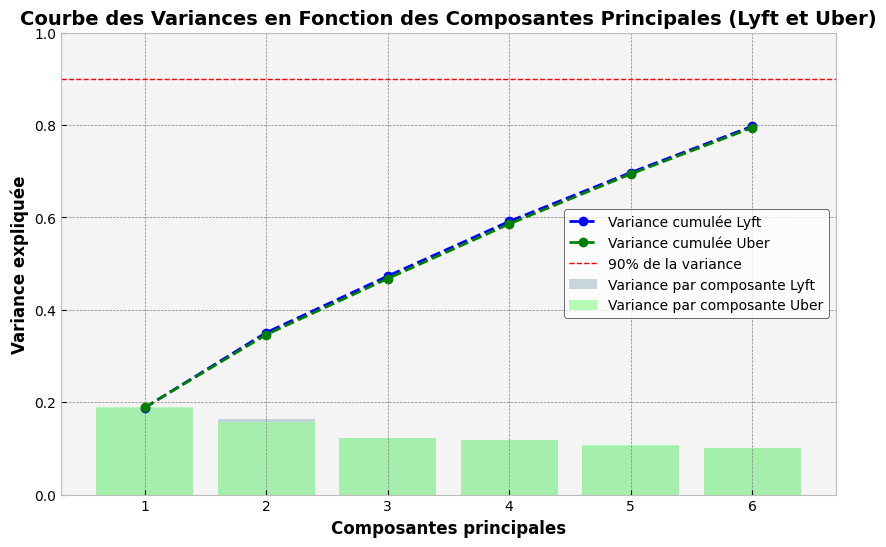

In [74]:
# Récupérer la variance expliquée par composante et la variance cumulée
explained_variance_ratio_lyft = pca_lyft.explained_variance_ratio_
explained_variance_ratio_uber = pca_uber.explained_variance_ratio_

# Création de la figure
plt.figure(figsize=(10, 6))

# Courbe de variance cumulée pour Lyft
plt.plot(np.arange(1, len(explained_variance_ratio_lyft) + 1), np.cumsum(explained_variance_ratio_lyft),
         marker='o', linestyle='--', color='b', label='Variance cumulée Lyft')

# Barplot de variance par composante pour Lyft
plt.bar(np.arange(1, len(explained_variance_ratio_lyft) + 1), explained_variance_ratio_lyft,
        alpha=0.7, color='#AEC6CF', label='Variance par composante Lyft')

# Courbe de variance cumulée pour Uber
plt.plot(np.arange(1, len(explained_variance_ratio_uber) + 1), np.cumsum(explained_variance_ratio_uber),
         marker='o', linestyle='--', color='g', label='Variance cumulée Uber')

# Barplot de variance par composante pour Uber
plt.bar(np.arange(1, len(explained_variance_ratio_uber) + 1), explained_variance_ratio_uber,
        alpha=0.7, color='#98FB98', label='Variance par composante Uber')

# Axe X avec des valeurs de 1 en 1
plt.xticks(np.arange(1, len(explained_variance_ratio_lyft) + 1, 1))

# Ligne horizontale pour les 90% de variance expliquée
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1, label='90% de la variance')

# Rallonger l'axe des Y
plt.ylim(0, 1)  # Ajuster la limite de l'axe Y de 0 à 1 pour visualiser la droite à 90% de la variance expliquée

# Labels et titre
plt.xlabel('Composantes principales', fontsize=12, fontweight='bold')
plt.ylabel('Variance expliquée', fontsize=12, fontweight='bold')
plt.title('Courbe des Variances en Fonction des Composantes Principales (Lyft et Uber)', fontsize=14, fontweight='bold')

# Activation du fond gris pour la grille
plt.gca().set_facecolor('#f4f4f4')  # Fond gris

# Ajout d'un quadrillage visible en pointillés gris clair
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Ajout de la légende
plt.legend(frameon=True, facecolor='white', edgecolor='black')

# Affichage du graphique
plt.show()

In [75]:
# Imprimer les composantes principales pour Uber
print("Composantes principales pour Uber:")
print(pca_uber.components_)

# Imprimer les composantes principales pour Lyft
print("Composantes principales pour Lyft:")
print(pca_lyft.components_)

Composantes principales pour Uber:
[[-0.59809189  0.12596224  0.63449256 -0.0187016   0.00466231  0.00319664
   0.00934051  0.00192369 -0.27468027  0.29234261 -0.24990538]
 [ 0.0463864   0.33278158 -0.06511085 -0.01058852  0.03143667  0.58826925
  -0.53998156  0.00711635 -0.27174663 -0.34557961 -0.22539295]
 [-0.03367971 -0.1027414   0.01758822  0.11081744  0.65898722  0.08257981
  -0.13031474  0.67932439  0.19011228  0.13800698  0.03137333]
 [-0.21230897 -0.45671194  0.16410314  0.15659323  0.02109834  0.04738832
  -0.05419968  0.01990809 -0.38122697 -0.42804553  0.60025504]
 [-0.17208306 -0.2707782   0.05092274  0.33827486 -0.26404207  0.26990437
  -0.44782286 -0.18770064  0.52993348  0.31542961  0.14620129]
 [-0.09523103  0.35508071 -0.0043414   0.81701092 -0.026055   -0.25362051
   0.12336996  0.04128635  0.0803236  -0.30957001 -0.11450172]]
Composantes principales pour Lyft:
[[-0.60796536 -0.02405702  0.64087655  0.01551131 -0.03742521 -0.11706896
   0.09914523 -0.03126076 -0.1935

In [76]:
# Créer un DataFrame pour les poids (loadings) des composantes principales pour Uber
loadings_uber = pd.DataFrame(pca_uber.components_, columns=columns_to_keep)

# Créer un DataFrame pour les poids (loadings) des composantes principales pour Lyft
loadings_lyft = pd.DataFrame(pca_lyft.components_, columns=columns_to_keep)

# Afficher les DataFrames des poids (loadings) pour Uber et Lyft
print("Loadings pour Uber:")
print(loadings_uber)

print("\nLoadings pour Lyft:")
print(loadings_lyft)

Loadings pour Uber:
       hour  day_of_week  hour_sin  hour_cos  distance  latitude  longitude  \
0 -0.598092     0.125962  0.634493 -0.018702  0.004662  0.003197   0.009341   
1  0.046386     0.332782 -0.065111 -0.010589  0.031437  0.588269  -0.539982   
2 -0.033680    -0.102741  0.017588  0.110817  0.658987  0.082580  -0.130315   
3 -0.212309    -0.456712  0.164103  0.156593  0.021098  0.047388  -0.054200   
4 -0.172083    -0.270778  0.050923  0.338275 -0.264042  0.269904  -0.447823   
5 -0.095231     0.355081 -0.004341  0.817011 -0.026055 -0.253621   0.123370   

      price  temperature  humidity  windSpeed  
0  0.001924    -0.274680  0.292343  -0.249905  
1  0.007116    -0.271747 -0.345580  -0.225393  
2  0.679324     0.190112  0.138007   0.031373  
3  0.019908    -0.381227 -0.428046   0.600255  
4 -0.187701     0.529933  0.315430   0.146201  
5  0.041286     0.080324 -0.309570  -0.114502  

Loadings pour Lyft:
       hour  day_of_week  hour_sin  hour_cos  distance  latitude  lon

4 - Sélection du modèle


Méthode du coude pour Uber :


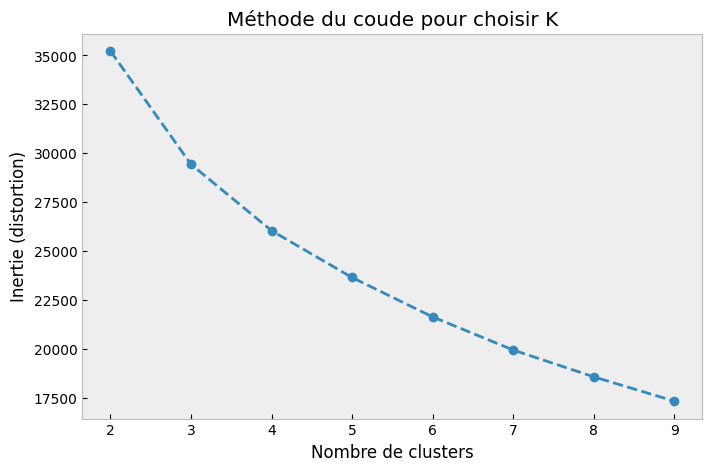

Méthode du coude pour Lyft :


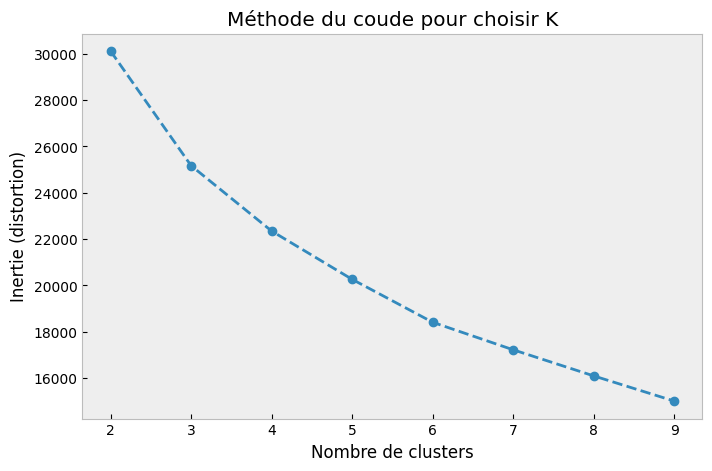

In [77]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Appliquer un fond gris pour le style
plt.style.use('bmh')

# Fonction pour la méthode du coude
def elbow_method(pca_features, K_range=range(2, 10)):
    inertia = []

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pca_features)
        inertia.append(kmeans.inertia_)

    # Tracer la courbe du coude
    plt.figure(figsize=(8,5))
    plt.plot(K_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie (distortion)')
    plt.title('Méthode du coude pour choisir K')
    plt.grid()
    plt.show()

# Appliquer la méthode du coude pour Uber
print("Méthode du coude pour Uber :")
elbow_method(pca_uber_components)  # Appliquer sur les données transformées par PCA pour Uber

# Appliquer la méthode du coude pour Lyft
print("Méthode du coude pour Lyft :")
elbow_method(pca_lyft_components)  # Appliquer sur les données transformées par PCA pour Lyft


In [78]:
# Choisir le nombre optimal de cluster selon la méthode du coude et appliquer Kmeans

# Appliquer KMeans sur les données réduites à 6 dimensions pour Uber
kmeans_uber = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_uber = kmeans_uber.fit_predict(df_pca_uber_components)

# Appliquer KMeans sur les données réduites à 6 dimensions pour Lyft
kmeans_lyft = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_lyft = kmeans_lyft.fit_predict(df_pca_lyft_components)

# Ajouter les labels des clusters
df_pca_uber_components['Cluster'] = labels_uber # Ajouter la colonne "Cluster" avec les labels KMeans
df_pca_lyft_components['Cluster'] = labels_lyft # Ajouter la colonne "Cluster" avec les labels KMeans

# Ajouter les labels des clusters aux DataFrames Uber et Lyft
df_uber_clustered = df_pca_uber.copy()  # Créer une copie du DataFrame Uber
df_uber_clustered['Cluster'] = labels_uber  # Ajouter la colonne "Cluster" avec les labels KMeans

df_lyft_clustered = df_pca_lyft.copy()  # Créer une copie du DataFrame Lyft
df_lyft_clustered['Cluster'] = labels_lyft  # Ajouter la colonne "Cluster" avec les labels KMeans

# Afficher les résultats
print("Clusters Uber:")
print(df_uber_clustered.head())

print("\nClusters Lyft:")
print(df_lyft_clustered.head())

Clusters Uber:
    hour  day_of_week  hour_sin  hour_cos  distance  latitude  longitude  \
12    22            4 -0.500000  0.866025      1.11   42.3647   -71.0542   
13    10            3  0.500000 -0.866025      1.11   42.3647   -71.0542   
14    19            3 -0.965926  0.258819      1.11   42.3647   -71.0542   
15    23            6 -0.258819  0.965926      1.11   42.3647   -71.0542   
16     0            4  0.000000  1.000000      1.11   42.3647   -71.0542   

    price  temperature  humidity  windSpeed  Cluster  
12   12.0        40.13      0.60       3.38        0  
13   16.0        20.38      0.66       2.94        1  
14    7.5        32.85      0.56       2.65        0  
15    7.5        41.29      0.86       8.30        0  
16   26.0        31.25      0.64       2.62        3  

Clusters Lyft:
   hour  day_of_week  hour_sin  hour_cos  distance  latitude  longitude  \
0     9            6  0.707107 -0.707107      0.44   42.2148    -71.033   
1     2            1  0.500000  

In [79]:
# Réduction en 2D pour visualisation
pca_2D = PCA(n_components=2)
reduced_matrix_uber = pca_2D.fit_transform(df_pca_uber_components.drop(columns=['Cluster']))
reduced_matrix_lyft = pca_2D.fit_transform(df_pca_lyft_components.drop(columns=['Cluster']))

In [80]:
# Ajouter les labels de clusters pour visualisation
df_pca_uber_2D = pd.DataFrame(reduced_matrix_uber, columns=['PC1', 'PC2'])
df_pca_uber_2D['Cluster'] = labels_uber

df_pca_lyft_2D = pd.DataFrame(reduced_matrix_lyft, columns=['PC1', 'PC2'])
df_pca_lyft_2D['Cluster'] = labels_lyft

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


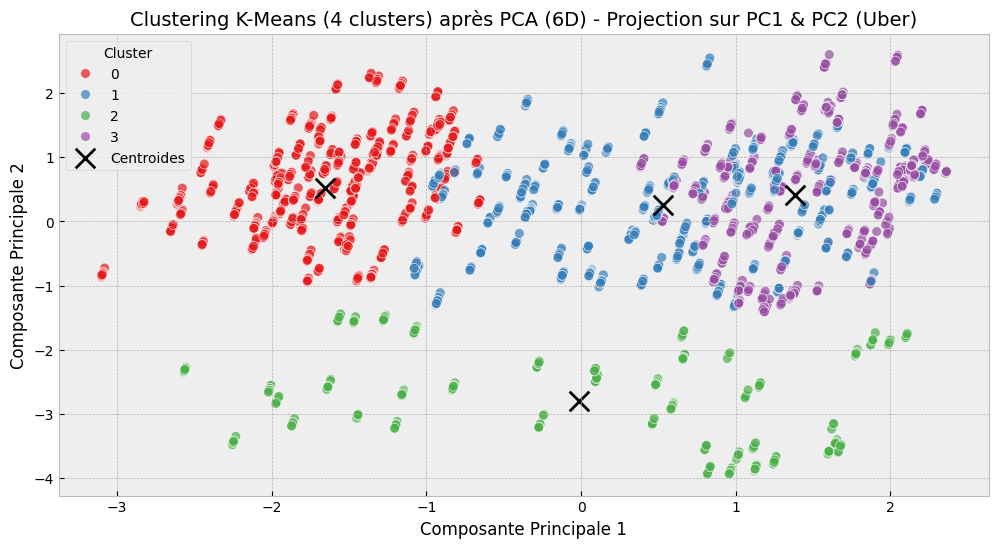

Centroïdes projetés en 2D (Uber) :
[[-1.65545777  0.52452229]
 [ 0.53080153  0.25105098]
 [-0.01586091 -2.79454159]
 [ 1.38421926  0.41225317]]


In [81]:
# Visualisation des clusters Uber et clusters Lyft dans un espace 2D avec composante principale n°1 et composante principale n°2

# Appliquer un fond gris pour le style
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_uber_2D, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=50, alpha=0.7, edgecolor='w')

# Projeter les centroïdes en 2D
centroids_uber_6D = kmeans_uber.cluster_centers_
centroids_uber_2D = pca_2D.transform(centroids_uber_6D)  # Projeter en 2D

# Affichage des centroïdes
plt.scatter(centroids_uber_2D[:, 0], centroids_uber_2D[:, 1], c='black', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (4 clusters) après PCA (6D) - Projection sur PC1 & PC2 (Uber)", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Afficher les centroïdes projetés
print("Centroïdes projetés en 2D (Uber) :")
print(centroids_uber_2D)

In [82]:
# Ajouter les labels de clusters dans le DataFrame Uber (df_pca_uber)
df_pca_uber['Cluster'] = labels_uber

# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_summary_uber = df_pca_uber.groupby("Cluster")[columns_to_keep].mean()

# Afficher les moyennes
print("Résumé des caractéristiques des clusters pour Uber :")
print(cluster_summary_uber)

Résumé des caractéristiques des clusters pour Uber :
              hour  day_of_week  hour_sin  hour_cos  distance   latitude  \
Cluster                                                                    
0        19.049344     2.810119 -0.758289  0.217580  2.179519  42.356529   
1        11.090278     2.647222  0.193536 -0.795083  2.200646  42.357063   
2        11.651899     2.197785  0.038539  0.098252  2.110459  42.214800   
3         3.135667     3.046681  0.607114  0.571092  2.108855  42.355319   

         longitude      price  temperature  humidity  windSpeed  
Cluster                                                          
0       -71.071313  16.014649    42.514991  0.659906   6.804310  
1       -71.068554  15.532254    36.887792  0.803174   5.662222  
2       -71.033000  15.402220    41.579351  0.796487   7.023085  
3       -71.073572  16.057920    37.998950  0.742254   5.802655  


**Interprétation possible des clusters Uber**

-**Cluster 0** : Des courses en soirée, en milieu de semaine, plutôt urbaines, avec une température fraîche, un prix un peu élevé et du vent. Cela pourrait correspondre à des retours à la maison après le travail.

-**Cluster 1** : Courses en fin de matinée en semaine, température froide, humide, prix un peu moins élevé. Probablement des courses utilitaires, rendez-vous ou déplacements professionnels.

-**Cluster 2** : Des courses en périphérie, le week-end ou début de semaine, avec vent fort, humidité élevée, prix bas et distance courte. Cela pourrait correspondre à des trajets locaux ou résidentiels hors du centre.

-**Cluster 3** : Courses de nuit en semaine, au centre-ville, avec une distance courte mais prix élevé. Cela peut indiquer un effet de tarification nocturne ou surcharge (surge). Peut-être des trajets de fin de soirée ou début de matinée, après des sorties.




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


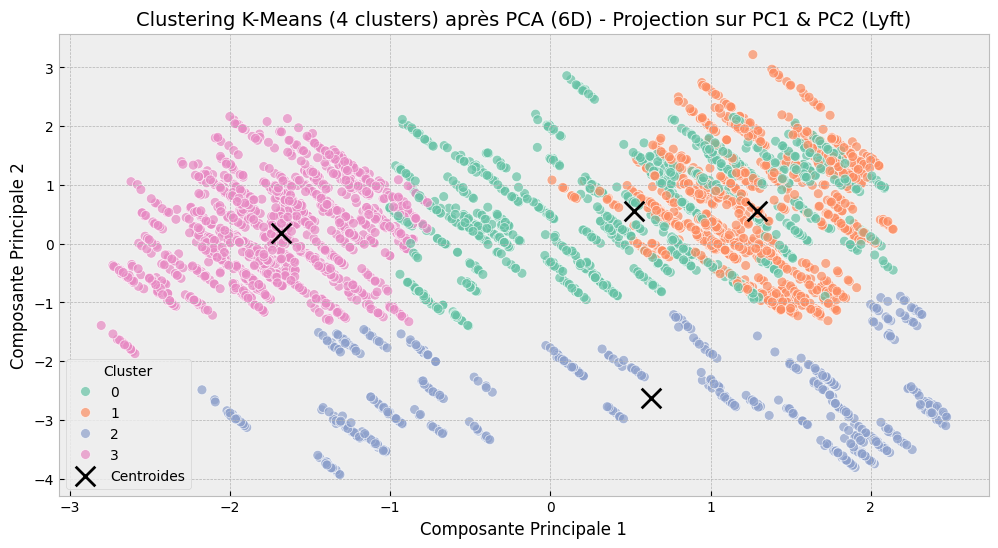

Centroïdes projetés en 2D (Lyft) :
[[ 0.5233821   0.54887764]
 [ 1.28799282  0.55357157]
 [ 0.62852521 -2.62222681]
 [-1.68068247  0.17186694]]


In [83]:
# Visualisation des clusters Lyft dans un espace 2D avec composante principale n°1 et composante principale n°2

# Appliquer un fond gris pour le style
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_lyft_2D, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=50, alpha=0.7, edgecolor='w')

# Projeter les centroïdes en 2D
centroids_lyft_6D = kmeans_lyft.cluster_centers_
centroids_lyft_2D = pca_2D.transform(centroids_lyft_6D)  # Projeter en 2D

# Affichage des centroïdes
plt.scatter(centroids_lyft_2D[:, 0], centroids_lyft_2D[:, 1], c='black', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (4 clusters) après PCA (6D) - Projection sur PC1 & PC2 (Lyft)", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Afficher les centroïdes projetés
print("Centroïdes projetés en 2D (Lyft) :")
print(centroids_lyft_2D)

In [84]:
# Ajouter les labels de clusters dans le DataFrame Lyft (df_pca_lyft)
df_pca_lyft['Cluster'] = labels_lyft

# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_summary_lyft = df_pca_lyft.groupby("Cluster")[columns_to_keep].mean()

# Afficher les moyennes
print("Résumé des caractéristiques des clusters pour Lyft :")
print(cluster_summary_lyft)

Résumé des caractéristiques des clusters pour Lyft :
              hour  day_of_week  hour_sin  hour_cos  distance   latitude  \
Cluster                                                                    
0        11.029229     2.691763  0.207722 -0.790159  2.049619  42.356271   
1         3.257391     2.845217  0.611576  0.543620  2.115096  42.355561   
2        10.850174     2.036585  0.054938  0.138890  2.012666  42.214800   
3        18.703039     2.915055 -0.743739  0.143624  2.130546  42.356564   

         longitude      price  temperature  humidity  windSpeed  
Cluster                                                          
0       -71.070014  16.666076    37.466324  0.825182   4.893800  
1       -71.072476  17.066087    37.955930  0.741704   6.292739  
2       -71.033000  16.169861    41.444704  0.787700   7.222195  
3       -71.071027  17.208218    41.908128  0.650753   6.871146  


**Interprétation possible des clusters Lyft**

-**Cluster 0** : Courses en milieu de semaine, en matinée, avec forte humidité, peu de vent, prix modéré, dans le centre-ville. Cela peut refléter des trajets quotidiens réguliers (courses pro ou RDV).

-**Cluster 1** : Des courses de nuit en semaine, avec une humidité plus modérée, prix élevé, peut-être à cause d'une surcharge nocturne. Cela ressemble au cluster de nuit observé chez Uber aussi.

-**Cluster 2** : Courses en périphérie, le week-end ou en début de semaine, en matinée, distance et prix bas, mais conditions météo plus difficiles (vent et humidité). Cela évoque des trajets locaux ou résidents.

-**Cluster 3** : Courses de fin de journée, avec distance plus élevée, prix maximum, moins d'humidité, mais vent fort. Probablement des trajets de retour en soirée avec surcharge, typiques d’un usage pro ou domicile-travail.

**Comparaison avec les clusters de Uber**

-**Cluster 0** : Bien qu’ils aient un lieu et jour similaires, ce ne sont pas les mêmes moments de la journée. Uber capture la fin de journée, alors que Lyft regroupe des courses de matinée. Uber semble profiter de trajets après le travail, alors que Lyft vise des utilisateurs en matinée, peut-être plus réguliers.

-**Cluster 1** : Ces clusters n’ont pas les mêmes horaires. Lyft regroupe les trajets de nuit, tandis qu'Uber est plus sur une matinée calme. Ce cluster Lyft pourrait refléter des courses nocturnes de sorties, avec des prix plus élevés (surcharge ?).

-**CLuster 2** : Très similaires entre Uber et Lyft. Courses locales, matinales, en début de semaine (ou week-end), en périphérie. Cela semble refléter des trajets résidentiels réguliers, à faible coût et courte distance.

-**Cluster 3** : Uber capture ici les courses nocturnes, tandis que Lyft cible les retours du soir, avec un prix et une température plus élevés. Uber a ici des trajets “after hours”, Lyft est plus en phase avec des horaires de pointe.

5- Evaluation du modèle

In [85]:
# Calcul du Silhouette Score pour Uber
sil_score_uber = silhouette_score(reduced_matrix_uber, kmeans_uber.labels_)
print(f'Silhouette Score pour Uber: {sil_score_uber}')

# Calcul du Silhouette Score pour Lyft
sil_score_lyft = silhouette_score(reduced_matrix_lyft, kmeans_lyft.labels_)
print(f'Silhouette Score pour Lyft: {sil_score_lyft}')

Silhouette Score pour Uber: 0.2623401660848723
Silhouette Score pour Lyft: 0.26361162782376374


In [86]:
# Calcul du score de silhouette global dans un espace à 6 dimensions (6 composantes principales)
silhouette_avg_uber = silhouette_score(df_pca_uber_components, labels_uber)
print(f"Score moyen de silhouette uber (6D) : {silhouette_avg_uber:.4f}")

silhouette_avg_lyft = silhouette_score(df_pca_lyft_components, labels_lyft)
print(f"Score moyen de silhouette lyft (6D) : {silhouette_avg_lyft:.4f}")


Score moyen de silhouette uber (6D) : 0.2886
Score moyen de silhouette lyft (6D) : 0.2953


In [87]:
# Validation croisée avec Kfold pour évaluation de la stabilité des clusters

# Fonction pour calculer la stabilité des clusters
def kfold_validation(X, n_clusters, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    kmeans_inertia = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(X_train)
        kmeans_inertia.append(kmeans.inertia_)  # Inertie sur les données d'entraînement

    # Calculer la moyenne de l'inertie à travers les folds
    mean_inertia = np.mean(kmeans_inertia)
    return mean_inertia

# Validation croisée pour Uber
mean_inertia_uber = kfold_validation(reduced_matrix_uber, n_clusters=4)
print(f'Moyenne de l\'inertie pour Uber (KFold): {mean_inertia_uber}')

# Validation croisée pour Lyft
mean_inertia_lyft = kfold_validation(reduced_matrix_lyft, n_clusters=3)
print(f'Moyenne de l\'inertie pour Lyft (KFold): {mean_inertia_lyft}')

Moyenne de l'inertie pour Uber (KFold): 3546.739295070366
Moyenne de l'inertie pour Lyft (KFold): 4117.905589493902


In [88]:
# Evaluation de la compacité des clusters

# Inertie pour Uber
inertia_uber = kmeans_uber.inertia_
print(f'Inertie pour Uber: {inertia_uber}')

# Inertie pour Lyft
inertia_lyft = kmeans_lyft.inertia_
print(f'Inertie pour Lyft: {inertia_lyft}')

Inertie pour Uber: 26035.930055870613
Inertie pour Lyft: 22346.533222284743


**Analyse des métriques d'évaluation**

**Silhouette score**

Interprétation des résultats :

Silhouette Score pour Uber : 0.262

Silhouette Score pour Lyft : 0.264

Ces scores sont relativement faibles, ce qui indique que les clusters pour Uber et Lyft ne sont pas particulièrement bien séparés. Cela suggère que le modèle de clustering pourrait être amélioré, car les points au sein de chaque cluster ne sont pas très éloignés de ceux des autres clusters. Cependant, les scores sont très similaires pour Uber et Lyft, ce qui montre que la séparation des clusters est globalement comparable entre les deux services.

Score moyen de silhouette (pour 6 dimensions) :

Uber : 0.2886

Lyft : 0.2953

Ces scores sont un peu plus élevés que les scores de silhouette pour les clusters d'origine, ce qui indique que, lorsqu'on prend en compte 6 dimensions (probablement une approche avec plus de variables), la séparation des clusters devient légèrement meilleure.

**Inertie**

Inertie pour Uber : 26,035.93

Inertie pour Lyft : 22,346.53

L'inertie est plus faible pour Lyft que pour Uber, ce qui suggère que, pour les mêmes paramètres de clustering, les points de Lyft sont globalement plus proches de leurs centres de clusters que ceux d'Uber. Cela pourrait signifier que le modèle de clustering est légèrement plus cohérent ou compact pour Lyft, même si les scores de silhouette ne sont pas très élevés.

Moyenne de l'inertie pour Uber (KFold) : 3,546.74

Moyenne de l'inertie pour Lyft (KFold) : 4,117.91

L'inertie moyenne sur les splits KFold est également plus faible pour Uber que pour Lyft, ce qui montre que les clusters formés à partir des données Uber sont plus stables et homogènes (ils ont des points qui sont plus proches de leurs centres à travers différents sous-ensembles de données). Cela pourrait aussi signifier que la méthode de clustering est mieux adaptée pour Uber en termes de variance et de stabilité dans différents ensembles de données.

Synthèse :

Silhouette Scores faibles (0.26 et 0.27) pour Uber et Lyft suggèrent que les clusters ne sont pas parfaitement bien séparés, mais les deux services sont relativement similaires à cet égard.

Inertie plus faible pour Lyft (22,346.53 contre 26,035.93) suggère que les clusters Lyft sont plus compacts et mieux regroupés, tandis qu'Uber présente une plus grande dispersion.

Inertie moyenne sur KFold plus faible pour Uber (3,546.74 contre 4,117.91) montre que, sur différents sous-ensembles de données, les clusters Uber sont plus stables et cohérents.

Globalement, on peut conclure que Lyft a des clusters un peu plus compacts, mais Uber montre une meilleure stabilité sur les différents sous-ensembles de données, même si les deux services ont des scores de silhouette similaires indiquant une séparation modérée des clusters. Pour améliorer les résultats de clustering, il pourrait être utile d'explorer différentes méthodes ou de réajuster les paramètres de clustering.

=> Décision de réajuster les paramètres du clustering

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes à conserver
columns_to_keep = [
    "hour", #"day_of_week",
    "hour_sin", "hour_cos",  # Heure (périodique)
    "distance", #"latitude", "longitude",  # Géographie
    "price", #"surge_multiplier",  # Tarification
    "temperature", "humidity" #"windSpeed" # "precipIntensity"  # Météo
]

df_lyft_opti = df_clean[df_clean["cab_type"] == "Lyft"][columns_to_keep].copy()
df_uber_opti = df_clean[df_clean["cab_type"] == "Uber"][columns_to_keep].copy()

# Normalisation des données pour Lyft
scaler_lyft = StandardScaler()
df_pca_lyft_scaled = scaler_lyft.fit_transform(df_lyft_opti)

# Normalisation des données pour Uber
scaler_uber = StandardScaler()
df_pca_uber_scaled = scaler_uber.fit_transform(df_uber_opti)

# Vérification de la forme des matrices normalisées
print("Shape Lyft (normalisé) :", df_pca_lyft_scaled.shape)
print("Shape Uber (normalisé) :", df_pca_uber_scaled.shape)

Shape Lyft (normalisé) : (4301, 7)
Shape Uber (normalisé) : (5044, 7)


In [91]:
# PCA pour Lyft
pca_lyft = PCA(n_components=2, svd_solver='auto')
pca_lyft_components = pca_lyft.fit_transform(df_pca_lyft_scaled)

# PCA pour Uber
pca_uber = PCA(n_components=2, svd_solver='auto')
pca_uber_components = pca_uber.fit_transform(df_pca_uber_scaled)

# Création des DataFrames avec les composantes principales pour Lyft et Uber
df_pca_lyft_components = pd.DataFrame(pca_lyft_components, columns=[f'PC{i+1}' for i in range(2)])
df_pca_uber_components = pd.DataFrame(pca_uber_components, columns=[f'PC{i+1}' for i in range(2)])

# Affichage des premières lignes pour vérifier
print("Composantes principales Lyft :")
print(df_pca_lyft_components.head())

print("Composantes principales Uber :")
print(df_pca_uber_components.head())

# Vérification de la variance expliquée par chaque composante principale
print("\nVariance expliquée par chaque composante pour Lyft :")
print(pca_lyft.explained_variance_ratio_)

print("\nVariance expliquée par chaque composante pour Uber :")
print(pca_uber.explained_variance_ratio_)

Composantes principales Lyft :
        PC1       PC2
0  0.728749 -1.822567
1  1.770182 -1.797596
2  1.382527 -1.516137
3  1.716771 -0.053022
4  1.525379 -1.259591
Composantes principales Uber :
        PC1       PC2
0 -1.741020 -1.027779
1  1.228644 -2.045056
2 -1.703305 -2.014623
3 -1.108046 -0.517883
4  1.176517 -0.424583

Variance expliquée par chaque composante pour Lyft :
[0.28884237 0.19217518]

Variance expliquée par chaque composante pour Uber :
[0.28719619 0.19151466]


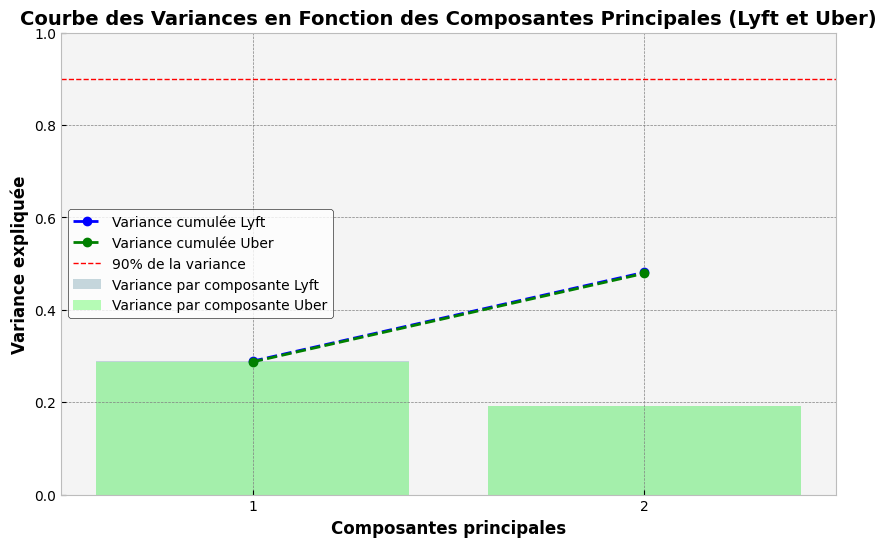

In [92]:
# Récupérer la variance expliquée par composante et la variance cumulée
explained_variance_ratio_lyft = pca_lyft.explained_variance_ratio_
explained_variance_ratio_uber = pca_uber.explained_variance_ratio_

# Création de la figure
plt.figure(figsize=(10, 6))

# Courbe de variance cumulée pour Lyft
plt.plot(np.arange(1, len(explained_variance_ratio_lyft) + 1), np.cumsum(explained_variance_ratio_lyft),
         marker='o', linestyle='--', color='b', label='Variance cumulée Lyft')

# Barplot de variance par composante pour Lyft
plt.bar(np.arange(1, len(explained_variance_ratio_lyft) + 1), explained_variance_ratio_lyft,
        alpha=0.7, color='#AEC6CF', label='Variance par composante Lyft')

# Courbe de variance cumulée pour Uber
plt.plot(np.arange(1, len(explained_variance_ratio_uber) + 1), np.cumsum(explained_variance_ratio_uber),
         marker='o', linestyle='--', color='g', label='Variance cumulée Uber')

# Barplot de variance par composante pour Uber
plt.bar(np.arange(1, len(explained_variance_ratio_uber) + 1), explained_variance_ratio_uber,
        alpha=0.7, color='#98FB98', label='Variance par composante Uber')

# Axe X avec des valeurs de 1 en 1
plt.xticks(np.arange(1, len(explained_variance_ratio_lyft) + 1, 1))

# Ligne horizontale pour les 90% de variance expliquée
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1, label='90% de la variance')

# Rallonger l'axe des Y
plt.ylim(0, 1)  # Ajuster la limite de l'axe Y de 0 à 1 pour visualiser la droite à 90% de la variance expliquée

# Labels et titre
plt.xlabel('Composantes principales', fontsize=12, fontweight='bold')
plt.ylabel('Variance expliquée', fontsize=12, fontweight='bold')
plt.title('Courbe des Variances en Fonction des Composantes Principales (Lyft et Uber)', fontsize=14, fontweight='bold')

# Activation du fond gris pour la grille
plt.gca().set_facecolor('#f4f4f4')  # Fond gris

# Ajout d'un quadrillage visible en pointillés gris clair
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Ajout de la légende
plt.legend(frameon=True, facecolor='white', edgecolor='black')

# Affichage du graphique
plt.show()

In [93]:
# Imprimer les composantes principales pour Uber
print("Composantes principales pour Uber:")
print(pca_uber.components_)

# Imprimer les composantes principales pour Lyft
print("Composantes principales pour Lyft:")
print(pca_lyft.components_)

Composantes principales pour Uber:
[[-0.63458551  0.66249955 -0.00610082  0.00488811  0.00655697 -0.27367025
   0.28878377]
 [-0.00467122 -0.00558168  0.08809575  0.54316143  0.58401238  0.4420454
   0.40085811]]
Composantes principales pour Lyft:
[[-0.63354094  0.66088217  0.02319251 -0.02511397 -0.0203246  -0.23093909
   0.32702612]
 [-0.03897415  0.03855548  0.05070071  0.6558075   0.65420665 -0.26730478
  -0.25475925]]


In [94]:
# Créer un DataFrame pour les poids (loadings) des composantes principales pour Uber
loadings_uber = pd.DataFrame(pca_uber.components_, columns=columns_to_keep)

# Créer un DataFrame pour les poids (loadings) des composantes principales pour Lyft
loadings_lyft = pd.DataFrame(pca_lyft.components_, columns=columns_to_keep)

# Afficher les DataFrames des poids (loadings) pour Uber et Lyft
print("Loadings pour Uber:")
print(loadings_uber)

print("\nLoadings pour Lyft:")
print(loadings_lyft)

Loadings pour Uber:
       hour  hour_sin  hour_cos  distance     price  temperature  humidity
0 -0.634586  0.662500 -0.006101  0.004888  0.006557    -0.273670  0.288784
1 -0.004671 -0.005582  0.088096  0.543161  0.584012     0.442045  0.400858

Loadings pour Lyft:
       hour  hour_sin  hour_cos  distance     price  temperature  humidity
0 -0.633541  0.660882  0.023193 -0.025114 -0.020325    -0.230939  0.327026
1 -0.038974  0.038555  0.050701  0.655807  0.654207    -0.267305 -0.254759


Méthode du coude pour Uber :


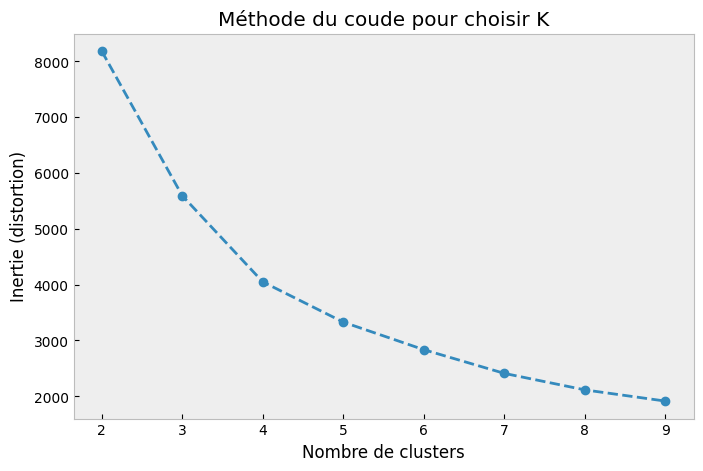

Méthode du coude pour Lyft :


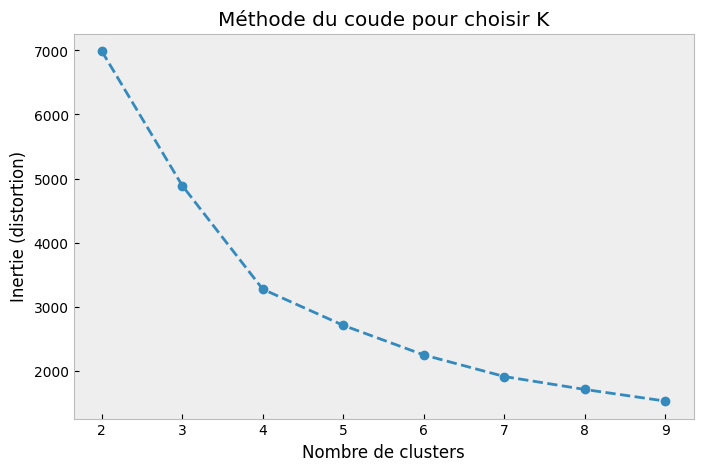

In [95]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fonction pour la méthode du coude
def elbow_method(pca_features, K_range=range(2, 10)):
    inertia = []

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pca_features)
        inertia.append(kmeans.inertia_)

    # Tracer la courbe du coude
    plt.figure(figsize=(8,5))
    plt.plot(K_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie (distortion)')
    plt.title('Méthode du coude pour choisir K')
    plt.grid()
    plt.show()

# Appliquer la méthode du coude pour Uber
print("Méthode du coude pour Uber :")
elbow_method(pca_uber_components)  # Appliquer sur les données transformées par PCA pour Uber

# Appliquer la méthode du coude pour Lyft
print("Méthode du coude pour Lyft :")
elbow_method(pca_lyft_components)  # Appliquer sur les données transformées par PCA pour Lyft


In [96]:
# Choisir le nombre optimal de cluster selon la méthode du coude et appliquer Kmeans

# Appliquer KMeans sur les données réduites à 2 dimensions pour Uber
kmeans_uber = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_uber = kmeans_uber.fit_predict(df_pca_uber_components)

# Appliquer KMeans sur les données réduites à 2 dimensions pour Lyft
kmeans_lyft = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_lyft = kmeans_lyft.fit_predict(df_pca_lyft_components)

# Ajouter les labels des clusters
df_pca_uber_components['Cluster'] = labels_uber # Ajouter la colonne "Cluster" avec les labels KMeans
df_pca_lyft_components['Cluster'] = labels_lyft # Ajouter la colonne "Cluster" avec les labels KMeans

# Ajouter les labels des clusters aux DataFrames Uber et Lyft
df_uber_clustered = df_uber_opti.copy()  # Créer une copie du DataFrame Uber
df_uber_clustered['Cluster'] = labels_uber  # Ajouter la colonne "Cluster" avec les labels KMeans

df_lyft_clustered = df_lyft_opti.copy()  # Créer une copie du DataFrame Lyft
df_lyft_clustered['Cluster'] = labels_lyft  # Ajouter la colonne "Cluster" avec les labels KMeans

# Afficher les résultats
print("Clusters Uber:")
print(df_uber_clustered.head())

print("\nClusters Lyft:")
print(df_lyft_clustered.head())

Clusters Uber:
    hour  hour_sin  hour_cos  distance  price  temperature  humidity  Cluster
12    22 -0.500000  0.866025      1.11   12.0        40.13      0.60        0
13    10  0.500000 -0.866025      1.11   16.0        20.38      0.66        3
14    19 -0.965926  0.258819      1.11    7.5        32.85      0.56        0
15    23 -0.258819  0.965926      1.11    7.5        41.29      0.86        0
16     0  0.000000  1.000000      1.11   26.0        31.25      0.64        3

Clusters Lyft:
   hour  hour_sin  hour_cos  distance  price  temperature  humidity  Cluster
0     9  0.707107 -0.707107      0.44    5.0        42.34      0.68        0
1     2  0.500000  0.866025      0.44   11.0        43.58      0.94        0
2     1  0.258819  0.965926      0.44    7.0        38.33      0.75        0
3     4  0.866025  0.500000      0.44   26.0        34.38      0.73        0
4     3  0.707107  0.707107      0.44    9.0        37.44      0.70        0


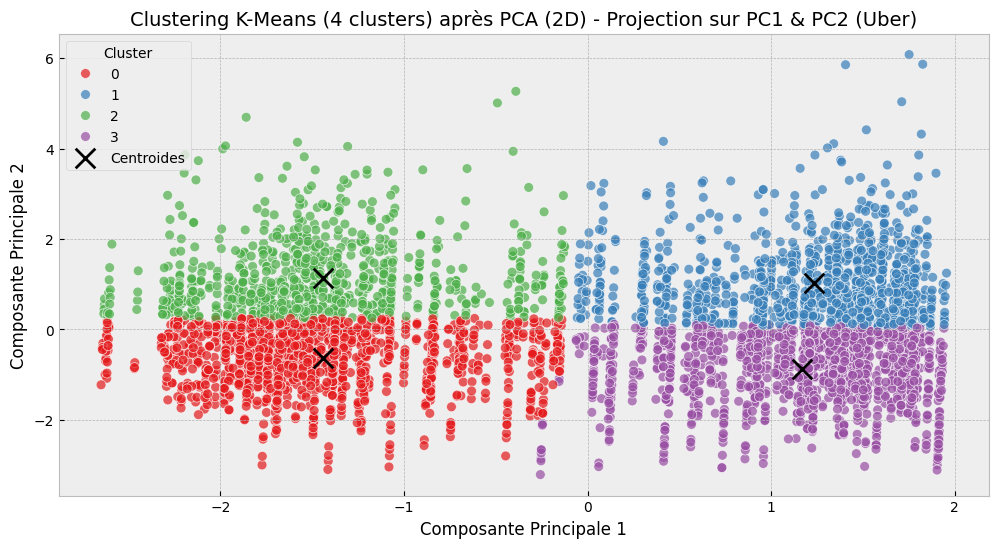

Centroïdes Uber :
[[-1.44081389 -0.63735068]
 [ 1.23659567  1.03056005]
 [-1.44037927  1.14507792]
 [ 1.16834447 -0.86380626]]


In [97]:
# Visualisation des clusters Uber et clusters Lyft dans un espace 2D avec composante principale n°1 et composante principale n°2

# Appliquer un fond gris pour le style
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_uber_components, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=50, alpha=0.7, edgecolor='w')

# Projeter les centroïdes en 2D
centroids_uber_2D = kmeans_uber.cluster_centers_

# Affichage des centroïdes
plt.scatter(centroids_uber_2D[:, 0], centroids_uber_2D[:, 1], c='black', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (4 clusters) après PCA (2D) - Projection sur PC1 & PC2 (Uber)", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Afficher les centroïdes projetés
print("Centroïdes Uber :")
print(centroids_uber_2D)

In [98]:
# Ajouter les labels de clusters dans le DataFrame Uber (df_pca_uber)
df_uber_opti['Cluster'] = labels_uber

# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_summary_uber = df_uber_opti.groupby("Cluster")[columns_to_keep].mean()

# Afficher les moyennes
print("Résumé des caractéristiques des clusters pour Uber :")
print(cluster_summary_uber)

Résumé des caractéristiques des clusters pour Uber :
              hour  hour_sin  hour_cos  distance      price  temperature  \
Cluster                                                                    
0        17.939876 -0.691503 -0.018048  1.694499  12.480880    40.542122   
1         5.728896  0.555925  0.056912  2.779700  20.489310    40.995154   
2        18.401659 -0.693497  0.083897  2.935889  21.283742    44.800498   
3         6.300460  0.540696 -0.043605  1.662702  12.156061    34.567738   

         humidity  
Cluster            
0        0.657298  
1        0.845073  
2        0.753922  
3        0.726851  


**-Cluster 0 :**  Ce cluster semble correspondre à des trajets effectués en soirée, avec une température modérément froide, une distance relativement courte et un prix modéré. L'humidité élevée pourrait indiquer des conditions météorologiques plus humides.

**-Cluster 1 :** Ce cluster semble indiquer des trajets matinaux avec une température froide, mais une distance plus longue que dans le Cluster 0. L'humidité très élevée pourrait être liée à des conditions de matinée avec de la brume ou de la pluie. Le prix plus élevé pourrait suggérer des trajets dans des zones avec une demande plus importante.

**-Cluster 2 :** Ce cluster ressemble à des trajets en soirée, avec une température plus élevée que celle du Cluster 0. La distance est plus longue et le prix également plus élevé. L'humidité élevée indique des conditions similaires au Cluster 0, mais avec des trajets plus longs et potentiellement plus chers.

**-Cluster 3 :** Ce cluster représente des trajets matinaux dans des conditions très froides, avec une distance courte et un prix relativement bas. L'humidité est encore assez élevée, suggérant une matinée potentiellement humide ou brumeuse.

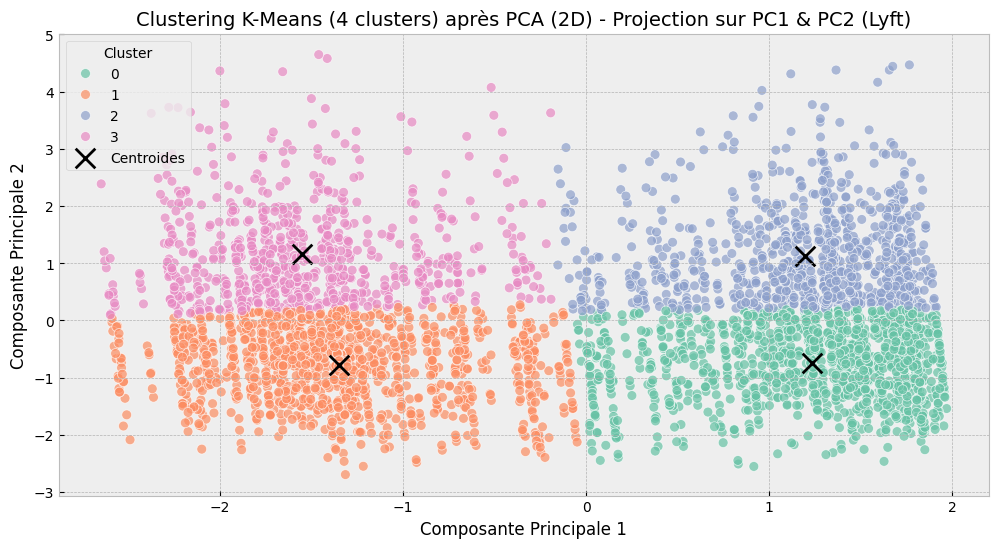

Centroïdes Lyft :
[[ 1.23692738 -0.73608875]
 [-1.3512497  -0.77817309]
 [ 1.19689232  1.12172141]
 [-1.54985719  1.15898495]]


In [99]:
# Visualisation des clusters Lyft dans un espace 2D avec composante principale n°1 et composante principale n°2

# Appliquer un fond gris pour le style
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_lyft_components, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=50, alpha=0.7, edgecolor='w')

# Projeter les centroïdes en 2D
centroids_lyft_2D = kmeans_lyft.cluster_centers_

# Affichage des centroïdes
plt.scatter(centroids_lyft_2D[:, 0], centroids_lyft_2D[:, 1], c='black', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (4 clusters) après PCA (2D) - Projection sur PC1 & PC2 (Lyft)", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Afficher les centroïdes projetés
print("Centroïdes Lyft :")
print(centroids_lyft_2D)

In [100]:
# Ajouter les labels de clusters dans le DataFrame Lyft (df_pca_lyft)
df_lyft_opti['Cluster'] = labels_lyft

# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_summary_lyft = df_lyft_opti.groupby("Cluster")[columns_to_keep].mean()

# Afficher les moyennes
print("Résumé des caractéristiques des clusters pour Lyft :")
print(cluster_summary_lyft)

Résumé des caractéristiques des clusters pour Lyft :
              hour  hour_sin  hour_cos  distance      price  temperature  \
Cluster                                                                    
0         6.094074  0.543607 -0.012074  1.533430  12.022963    39.290452   
1        17.889248 -0.688618 -0.028151  1.584762  12.176233    42.630485   
2         5.780992  0.560112  0.051096  2.830930  23.332128    35.442583   
3        18.171582 -0.712878  0.030060  2.970322  25.150804    40.665670   

         humidity  
Cluster            
0        0.814496  
1        0.711487  
2        0.743388  
3        0.643083  


**-Cluster 0 :** Ce cluster correspond à des trajets matinaux dans des conditions froides et humides, avec des distances relativement courtes et un prix modéré. L'humidité très élevée suggère que les trajets peuvent se produire par temps de pluie ou de brume, ce qui pourrait expliquer des prix bas (peu de demande pendant ces conditions).

**-Cluster 1 :**  Ce cluster représente des trajets en soirée, avec une température légèrement plus élevée que celle du Cluster 0. Les distances restent courtes et les prix sont modérés. L'humidité est plus faible que dans le Cluster 0, ce qui pourrait indiquer des conditions météorologiques moins défavorables. Le prix bas pourrait être associé à une demande faible durant cette période.

**-Cluster 2 :** Ce cluster semble correspondre à des trajets matinaux dans des conditions de froid extrême. Bien que les trajets soient plus longs que dans les autres clusters, le prix est également plus élevé. L'humidité relativement élevée indique que les trajets peuvent se produire sous des conditions météorologiques de brume, de pluie ou de neige. Cela pourrait expliquer la distance plus longue et le prix plus élevé, en raison d'une plus grande demande ou de conditions de conduite plus difficiles.

**-Cluster 3 :** Ce cluster représente également des trajets en soirée, avec des températures fraîches. Les distances sont plus longues et les prix plus élevés par rapport aux autres clusters. L'humidité modérée indique des conditions météorologiques moins extrêmes, mais les trajets plus longs et les prix plus élevés suggèrent une demande plus élevée ou des trajets dans des zones plus éloignées.

**Comparaison des clusters Uber et Lyft**

Heure des trajets :

Uber tend à avoir des trajets plus variés entre le matin et le soir (6 AM et 6 PM), avec un pic notable le soir dans les clusters 0 et 2.

Lyft a une tendance plus marquée vers les trajets matinaux (autour de 6 AM), sauf pour le Cluster 3 (en soirée).

Température :

Uber a des températures assez froides, avec une gamme allant de 34.57°F à 44.80°F.

Lyft a des températures qui varient entre 35.44°F et 42.63°F, légèrement plus froides dans certains clusters, mais généralement plus chaudes que celles de Uber.

Distance et Prix :

Uber semble avoir une gamme de distances et de prix plus modérés, avec des trajets plus courts dans certains clusters et des prix plus faibles, en particulier dans le Cluster 0.

Lyft, en revanche, a des trajets globalement plus longs et des prix plus élevés, particulièrement dans les clusters 2 et 3.

Humidité :

Uber semble avoir une humidité plus élevée dans les trajets matinaux (Cluster 1 et Cluster 0).

Lyft a également des niveaux d'humidité assez élevés, mais globalement plus faibles que ceux d'Uber, sauf dans le Cluster 0 où elle atteint des niveaux élevés.

Conclusion :

Les clusters de Lyft et Uber partagent des caractéristiques similaires en termes de température et d'humidité, mais avec des différences notables concernant l'heure des trajets, les distances parcourues, et les prix. Lyft tend à avoir des trajets plus longs avec des prix plus élevés, tandis qu'Uber semble offrir des trajets plus courts et moins coûteux, particulièrement en soirée. Les conditions météorologiques influencent fortement la demande dans les deux services, mais l'humidité semble légèrement plus élevée dans les trajets Uber.

In [101]:
# Calcul du score de silhouette global dans un espace à 8 dimensions (8 composantes principales)
silhouette_score_uber = silhouette_score(df_pca_uber_components, labels_uber)
print(f"Score de silhouette uber (2D) : {silhouette_score_uber:.4f}")

silhouette_score_lyft = silhouette_score(df_pca_lyft_components, labels_lyft)
print(f"Score de silhouette lyft (2D) : {silhouette_score_lyft:.4f}")

Score de silhouette uber (2D) : 0.6109
Score de silhouette lyft (2D) : 0.5983


In [102]:
# Fonction modifiée pour utiliser l'indexation pandas
def kfold_validation(X, n_clusters, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    kmeans_inertia = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Utiliser .iloc pour l'indexation pandas
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(X_train)
        kmeans_inertia.append(kmeans.inertia_)  # Inertie sur les données d'entraînement

    # Calculer la moyenne de l'inertie à travers les folds
    mean_inertia = np.mean(kmeans_inertia)
    return mean_inertia

# Validation croisée pour Uber
mean_inertia_uber = kfold_validation(df_pca_uber_components, n_clusters=4)
print(f'Moyenne de l\'inertie pour Uber (KFold): {mean_inertia_uber}')

# Validation croisée pour Lyft
mean_inertia_lyft = kfold_validation(df_pca_lyft_components, n_clusters=3)
print(f'Moyenne de l\'inertie pour Lyft (KFold): {mean_inertia_lyft}')

Moyenne de l'inertie pour Uber (KFold): 3238.7218563028914
Moyenne de l'inertie pour Lyft (KFold): 5384.1721711299815


In [103]:
# Evaluation de la compacité des clusters

# Inertie pour Uber
inertia_uber = kmeans_uber.inertia_
print(f'Inertie pour Uber: {inertia_uber}')

# Inertie pour Lyft
inertia_lyft = kmeans_lyft.inertia_
print(f'Inertie pour Lyft: {inertia_lyft}')

Inertie pour Uber: 4049.433495365244
Inertie pour Lyft: 3273.989391018008


**Analyse des métriques d'évaluation**

**Silhouette score**

Uber (2D) : 0.6109

Lyft (2D) : 0.5983

Interprétation :

Uber (0.6109) : Un score de 0.6109 est relativement élevé, ce qui indique que les clusters pour Uber sont bien séparés et que la majorité des points de données sont correctement assignés à leurs clusters respectifs. Cela signifie que les clusters sont relativement compacts et distincts les uns des autres.

Lyft (0.5983) : Un score de 0.5983 est légèrement inférieur à celui d'Uber, mais reste également un score acceptable. Cela suggère que les clusters pour Lyft sont également bien séparés, mais peut-être légèrement moins distincts ou plus "flous" que ceux d'Uber. Cependant, cette différence est minime, donc la qualité du clustering pour Lyft est encore assez bonne.

En résumé, Uber a un léger avantage en termes de la clarté de ses clusters par rapport à Lyft, mais les deux services ont des clusters assez compacts et distincts.

**Inertie moyenne (KFold)**

Moyenne de l'inertie pour Uber (KFold) : 3238.72

Moyenne de l'inertie pour Lyft (KFold) : 5384.17

Interprétation :

Uber (3238.72) : L'inertie pour Uber est plus faible, ce qui signifie que les clusters sont plus compacts et mieux définis. Les points de données dans chaque cluster sont plus proches du centre, ce qui est un signe positif de la qualité du clustering.

Lyft (5384.17) : L'inertie pour Lyft est plus élevée, ce qui suggère que les clusters sont moins compacts et que les points de données sont un peu plus dispersés autour du centre du cluster. Cela peut indiquer une moins bonne séparation ou une plus grande variance au sein des clusters.

En résumé, Uber montre des clusters plus compacts, tandis que les clusters de Lyft sont légèrement moins denses et plus dispersés.

Interprétation :

***Inertie***

Uber (4049.43) :

L'inertie pour Uber est plus élevée, ce qui signifie que les points de données dans les clusters d'Uber sont plus éloignés de leurs centres respectifs. En d'autres termes, les clusters sont moins compacts, et les données sont plus dispersées dans chaque cluster.

Cela peut indiquer que le modèle de clustering pour Uber a du mal à regrouper les points de manière très homogène, ou que les clusters eux-mêmes sont plus larges et moins bien définis.

Lyft (3273.99) :

L'inertie pour Lyft est plus faible que celle d'Uber, ce qui signifie que les clusters de Lyft sont plus compacts et que les points de données sont plus proches du centre de leurs clusters respectifs.

Cela suggère que le modèle de clustering pour Lyft a généré des clusters plus homogènes et plus denses, avec une meilleure définition des groupes.

Comparaison entre Uber et Lyft :
Lyft a une inertie plus faible que Uber, ce qui indique des clusters plus compacts et plus bien définis.

Uber, en revanche, présente des clusters qui sont plus dispersés, avec des points de données plus éloignés du centre, ce qui entraîne une inertie plus élevée.

Les clusters pour Lyft semblent être plus bien séparés et cohérents, tandis que ceux pour Uber sont plus dispersés, ce qui peut indiquer que le modèle de clustering pour Lyft est mieux adapté ou que les données de Lyft sont naturellement plus homogènes par rapport à celles d'Uber.

En résumé :

Lyft montre une meilleure compacité des clusters (inertie plus faible), suggérant des regroupements plus cohérents et denses.

Uber a des clusters plus dispersés (inertie plus élevée), ce qui peut indiquer une moins bonne séparation ou des clusters plus larges et moins homogènes.

Cela signifie que, dans l'ensemble, Lyft a un modèle de clustering plus efficace et compact comparé à Uber, du moins en fonction de l'inertie.

**Actions de suite:**

-Appliquer d’autres techniques de prétraitement des données pour réduire le bruit.

-Essayer d’autres algorithmes comme DBSCAN (si les clusters ne sont pas de forme sphérique) ou Gaussian Mixture Models (GMM) pour capturer des structures plus complexes
